<a href="https://colab.research.google.com/github/lafaye-UPV/V3DMI5/blob/master/colabs/2_Utilisation_ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIASHS cours de master sur l'analyse de données multidimensionnelle
## Cours 2: Utiliser l'analyse en composantes principales de `scikit-learn`
---
**Dans ce cours, vous allez apprendre à:**
* Utiliser l'implémentation de l'ACP de `scikit-learn`
* Exploiter et visualiser les résultats avec `seaborn`
---


# 1. Introduction

## a. Objectifs de ce cours

Dans ce cours, on va mettre en pratique le cours sur l'analyse en composantes principales (ACP), qui est un moyen très classique pour essayer d'explorer des données multidimensionnelles pour en tirer du sens.

## c. Remerciements

Les jeux de données de ce cours et du TP associé  proviennent des resources mises en place par [François Husson](https://husson.github.io/).
Vous êtes chaleureusement invités à consulter [son site](https://husson.github.io/MOOC.html) qui vous permettra de compléter le cours et d'avoir un autre angle d'approche.

La principale différence par rapport aux support mis en place par Husson est qu'on utilisera ici le langage Python plutôt que R.

# 2. Mise en place:chargement des données

Pour ce cours, on va charger à nouveau les données de températures des villes européennes, comme dans le précédent.


In [0]:
# on commence par importer le package pandas
import pandas

# Une fois pandas chargé, il est facile de lire des fichiers CSV qui contiennent des données.
# Chargeons les données de température des villes telles qu'utilisées dans la vidéo de Husson d'introduction à l'ACP.
data = pandas.read_csv('http://factominer.free.fr/livreV2/temperat.csv',
                       encoding = "ISO-8859-1", sep=';')
data = data.rename(columns={data.columns[0]: 'Ville'})
data = data.set_index(data.columns[0])

# affichons la table
data

,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre,Moyenne,Amplitude,Latitude,Longitude,Région
Ville,,,,,,,,,,,,,,,,,
Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,Ouest
Athènes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,Sud
Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,Ouest
Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,Ouest
Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,Est
Copenhague,-0.4,-0.4,1.3,5.8,11.1,15.4,17.1,16.6,13.3,8.8,4.1,1.3,7.8,17.5,55.4,12.3,Nord
Dublin,4.8,5.0,5.9,7.8,10.4,13.3,15.0,14.6,12.7,9.7,6.7,5.4,9.3,10.2,53.2,6.1,Nord
Helsinki,-5.8,-6.2,-2.7,3.1,10.2,14.0,17.2,14.9,9.7,5.2,0.1,-2.3,4.8,23.4,60.1,25.0,Nord
Kiev,-5.9,-5.0,-0.3,7.4,14.3,17.8,19.4,18.5,13.7,7.5,1.2,-3.6,7.1,25.3,50.3,30.3,Est


# 3. Application simple de l'ACP de `scikit-learn`

## a. Apprentissage des paramètres de l'ACP

Nous verrons plus tard comment recalculer nous même une ACP, et ainsi implémenter en python ce qu'on a vu en cours.

En attendant, nous allons commencer par utiliser une implémentation fiable et (très) populaire, celle de [`scikit-learn`](https://scikit-learn.org/stable/). Il s'agit d'une bibliothèque de modèles d'apprentissage automatique en Python.
Pour ce qui nous concerne aujourd'hui, `scikit-learn` fournit:
* La normalisation
* Le calcul de l'ACP et de ce qui va avec.

Vous trouverez la documentation correspondante [ici](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)


> _Pour fonctionner, `scikit-learn` manipule les données sous la forme de `ndarray`, tels que définis dans l'omniprésente bibliothèque de calcul [`numpy`](https://numpy.org/). Cette bibliothèque constitue la fondation de l'essentiel du calcul sur données en python. Il est donc bon d'en connaître le nom._



In [0]:
# Importons scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extrayons les données de température
data_columns = data.columns[:12]
x = data[data_columns]

# Maintenant, normalisons les données, c'est très simple avec scikit-learn
x = StandardScaler().fit_transform(x)

# Procédons à l'ACP, avec 2 composantes
n_components = 2

# Cela se fait en créant d'abord un objet de type `PCA`
pca = PCA(n_components=n_components)

# Puis de l'appliquer sur les données
pca.fit(x);


## b. Application de la transformation : réduction de dimension

Comme on le voit, apprendre une ACP sur des données est l'histoire de quelques lignes de code.

`scikit-learn` apprend en fait une _transformation_: à partir des données, l'ACP apprise est la transformation linéaire qui permet au mieux de capturer la variabilité des données.

Commençons par appliquer l'ACP à nos données


In [0]:
# appliquons l'ACP apprise
x_transformed = pca.transform(x)

print('Dimension initiale des données : ', x.shape)
print('          après ACP            : ', x_transformed.shape)



Dimension initiale des données :  (35, 12)
          après ACP            :  (35, 2)


Comme on le constate, la dimension des données a été réduite. C'est un des avantages principaux de la PCA de produire des données dans un espace de dimension plus faible !


# 4. Affichages

Une fois qu'on a calculé l'ACP, voyons comment l'exploiter pour une des tâches fondamentales de l'analyse de données multidimensionnelles: __l'affichage__ !

## a. Création d'un `DataFrame` pour l'ACP

Notre premier travail sera de créer un `DataFrame` spécifique qui contient l'ACP des données, ainsi que la Région de chaque ville.

In [0]:
# créons un DataFrame pandas pour ces données transformées, de manière à les afficher de manière pratique
pca_names = ['composante %d' % d for d in range(n_components)]
data_pca = pandas.DataFrame(x_transformed, 
                            index=data.index,
                            columns=pca_names)

# rajoutons l'info de région des données initiales
data_pca['Région'] = data['Région']

# affichons les premiers échantillons
data_pca.head()

,composante 0,composante 1,Région
Ville,,,
Amsterdam,-0.552355,1.250405,Ouest
Athènes,6.283917,-0.958226,Sud
Berlin,-1.018308,-0.032033,Ouest
Bruxelles,-0.174940,1.066045,Ouest
Budapest,0.798026,-1.612524,Est


## b. Exploration 1: densités

Une fois chargées comme un `DataFrame` `pandas`, on peut chercher à faire quelques affichages simples. Par exemple, voyons comment l'ACP se comporte en fonction des différentes régions.

[]

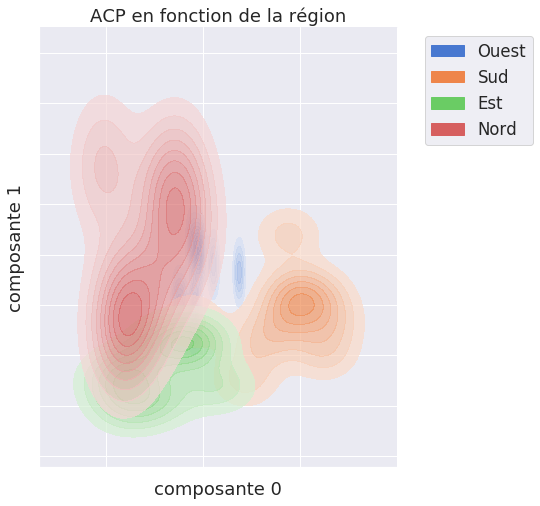

In [0]:
# on import seaborn et matplotlib.pyplot, les deux bibliothèques graphiques qu'on va utiliser
import seaborn as sns
import matplotlib.pyplot as plt

# on applique ses paramètres d'affichage par défaut de seaborn
sns.set(font_scale=1.5)

# on prépare un PairGrid, ou seront affichées les valeurs de l'ACP les unes en fonction des autres
g = sns.PairGrid(data_pca,
                 x_vars='composante 0',
                 y_vars='composante 1',
                 hue="Région",
                 palette="muted")
# on applique un kde plot
g = g.map(sns.kdeplot, shade=True, shade_lowest=False, alpha=0.7)

# ajoutons la légende, un titre
plt.legend(bbox_to_anchor=(1.4, 1.0))
plt.title('ACP en fonction de la région');
# agrandissons la figure, en supprimons les chiffres des axes
g.fig.set_size_inches(15,13)
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])

> Pour comprendre ce code, vous pouvez vous référer à:
  * La [documentation de `seaborn` en général](https://seaborn.pydata.org/index.html)
  * La documentation de [`PairGrid`](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid) et [`kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) en particulier.
>   
> Notez que ces docs sont très bien faites, et que c'est toujours facile de les trouver en tapant juste "seaborn kdeplot" sur Google, par exemple.
>
> Pour le reste, quand il s'agit pour vous de réaliser un affichage ou n'importe quel autre travail de programmation. Il vous suffit souvent de poser la question en anglais à Google avec quelques mots-clés pertinents: quelqu'un d'autre sur stackoverflow a probablement déjà eu le même problème.  
>
> Par exemple:
>
> ---
> 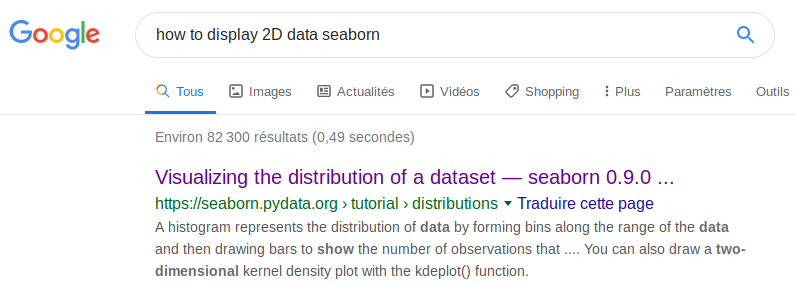
>
> _(pour afficher cette image, je l'ai simplement copiée/collée dans la cellule de texte)_
>
>---



### Discussion

Au niveau de l'interprétation du graphique ci-dessus, on voit que le comportement de la température se regroupe plus ou moins par régions, et que les deux groupes les plus éloignés sont le Nord et le Sud, ce qui parait logique.
Dans la mesure où les composantes d'une ACP n'ont pas vraiment de sens physique,il est dur d'en dire plus avec ce simple affichage.  

## c. Exploration 2: nuages de points

Cette manière de regrouper toutes les données n'est peut être pas le plus pertinent ? Peut être qu'il serait plus intéressant d'en fait faire un `ScatterPlot`, c'est à dire de garder l'information de chaque individu ? 

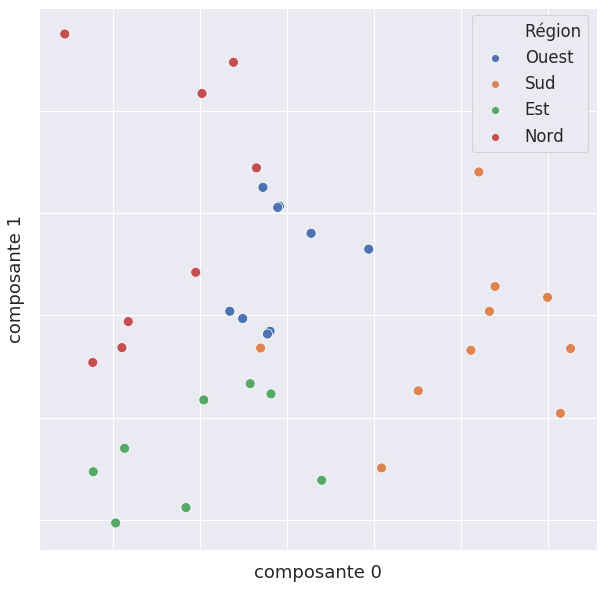

In [0]:
# Réalisons un affichage de nuage de points, où chaque donnée (ville) va apparaître 
g = sns.scatterplot(x='composante 0',
                    y='composante 1',
                    data=data_pca,
                    hue='Région',
                    s=100)

# supprimons les indications sur les axes
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])

# agrandissons la figure
plt.gcf().set_size_inches(10,10)

> Pour réaliser la figure suivante, on a choisi une taille des marqueurs de 100. Si vous regardez la doc de [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), vous ne verrez pas ce paramètre `s` affiché. Par contre, vous verrez que les paramètres qu'il ne connaît pas sont redirigés vers la fonction de base qui est utilisée: [matplotlib.pyplot.scatter](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html). C'est sure cette deuxième page que vous verrez ce paramètre apparaître. Il est important pour vous de comprendre comment vous promener dans les docs pour réaliser les affichages qui vous seront utiles.

Évidemment, comme dans la figure précédente, les différentes régions semblent bien se séparer, et cette fois on voit les différentes villes.
Mais quelle ville correspond à quel point ? 

Il est facile de rajouter cette information

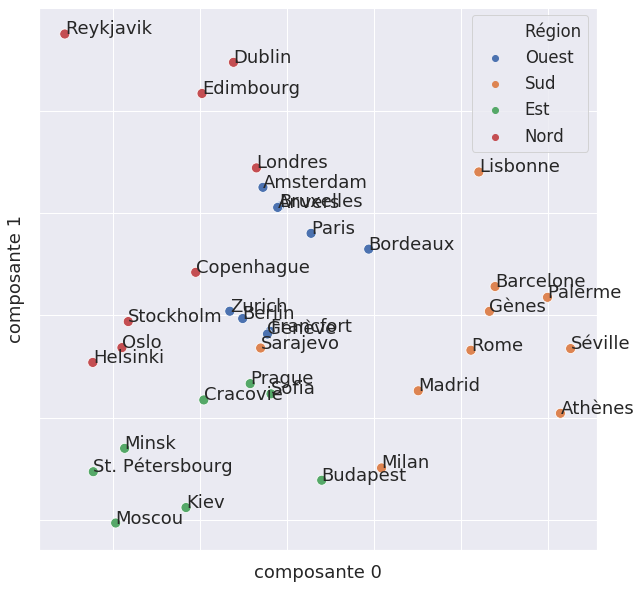

In [0]:
# Réalisons un affichage de nuage de points, où chaque donnée (ville) va apparaître 
g = sns.scatterplot(x='composante 0',
                    y='composante 1',
                    data=data_pca,
                    hue='Région',
                    s=100)

# supprimons les indications sur les axes
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])

# agrandissons la figure
plt.gcf().set_size_inches(10,10)

# gca() permet de récupérer les axes en cours
ax = plt.gca()

# pour chaque ville, rajoutons simplement son nom à ses coordonnées
for i, (text_x,text_y) in enumerate(data_pca.iloc[:,:2].to_numpy()):
  ax.annotate(data_pca.index[i], (text_x,text_y))

> L'élément de base d'un affichage sur `matplotlib` est la [Figure](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure). Ensuite, cette figure contient des [Axes](https://matplotlib.org/3.1.1/api/axes_api.html#matplotlib.axes.Axes) qui sont les containeurs de différents affichages. Ici, il s'agissait donc d'ajouter des annotations à l'axe en cours.
  La fonction `gca` permet de facilement récupérer l'axe en cours.

On voit que les annotations se recouvrent les unes les autres et ce n'est pas très joli. Avec une petite recherche Google, j'ai trouvé d'abord un lien sur stackoverflow:

---
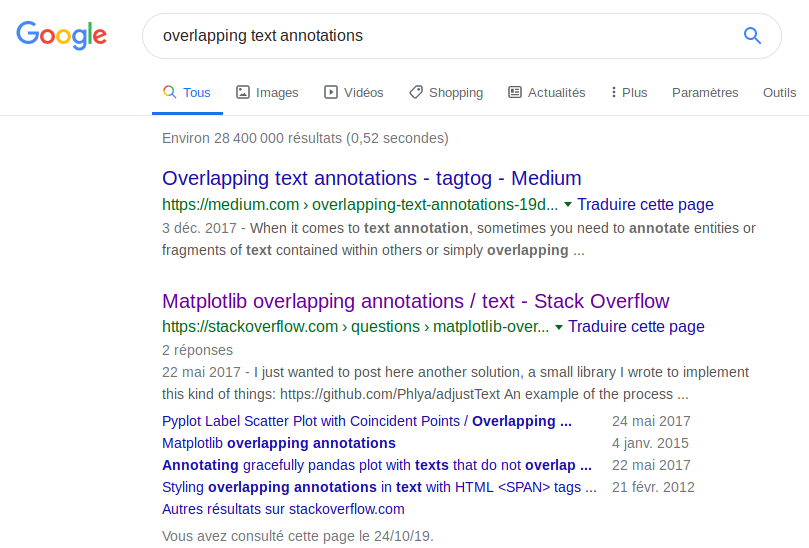

---

En suivant ce lien, je suis tombé sur cette réponse, qui avait l'air d'être parfaite, alors j'ai suivi l'exemple:

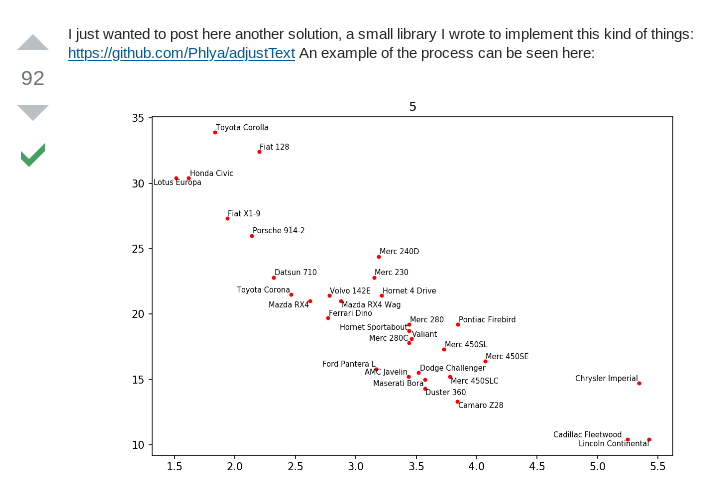

---

In [0]:
# dans un colab, on peut simplement ajouter des nouveaux paquets python qui sont disponibles sur pip:
!pip install adjustText
from adjustText import adjust_text

  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7099 sha256=f9bbfe327c4b928a662d5238b0888ab25b0db4be1318b90cd63923eddf4e3be4
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


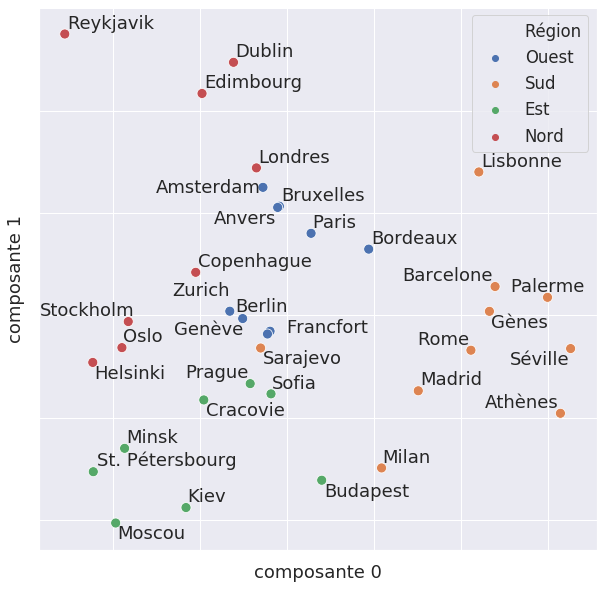

In [0]:
# Réalisons un affichage de nuage de points, où chaque donnée (ville) va apparaître 
g = sns.scatterplot(x='composante 0',
                    y='composante 1',
                    data=data_pca,
                    hue='Région',
                    s=100)

# supprimons les indications sur les axes
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])

# agrandissons la figure
plt.gcf().set_size_inches(10,10)

# gca() permet de récupérer les axes en cours
ax = plt.gca()

texts = []
# pour chaque ville, rajoutons simplement son nom à ses coordonnées
for i, (text_x,text_y) in enumerate(data_pca.iloc[:,:2].to_numpy()):
  texts.append(ax.annotate(data_pca.index[i], (text_x,text_y)))

# maintenant, appelons la fonction magique qu'on vient d'installer
adjust_text(texts);

### Discussion

Cette figure est clairement plus informative que la densité qu'on avait plus haut, et les regroupements des villes sont intéressants pour comparer les climats.

La chose principale qu'il nous manque pour vraiment tirer des conclusions est cependant un _recul critique_ sur notre représentation : à quel point est-elle valable ?

# 4. Prendre en compte la qualité de l'approximation

## a. Introduction

Une analyse en composante principale _modélise_ les données comme une combinaison de peu d'éléments:

$\boldsymbol{x}_i \approx \sum_{k=1}^{K}\lambda_{ki}\boldsymbol{v}_k$

Cependant, des fois cette approximation est bonne, des fois elle l'est moins.
Avant de tirer des conclusions, il pourrait être intéressant de prendre en compte la qualité de l'approximation. 

> Calculer la qualité d'un modèle et adapter sa discussion en fonction peut permettre de ne pas prendre ce modèle pour la réalité, mais d'ouvrir au contraire la porte à :
  * La découverte de faiblesses dans la méthode d'analyse, pouvant peut être mener à de nouvelles recherches
  * Des découvertes sur les données elles-mêmes: que certaines observations soient mal expliquées est en soi souvent intéressant.  

Dans `scikit-learn`, il est très facile d'obtenir pour chaque point __le score__ de son ACP. Sans rentrer dans les détails:
* ce score est faible si le point est mal expliqué par la PCA
* ce score est élevé s'il est bien expliqué.



## b. Le calcul de scores dans `scikit-learn`

Demandons à `scikit-learn` de calculer ces scores, pour chaque point.
> Dans scikit-learn, les scores sont données comme un logarithme. Repassons-les par une exponentielle pour avoir des scores positifs, qu'on aura plus de facilité à utiliser pour nos affichages.

In [0]:
import numpy as np
data_pca['interprétabilité'] = np.exp(pca.score_samples(x))
data_pca.head()

,composante 0,composante 1,Région,interprétabilité
Ville,,,,
Amsterdam,-0.552355,1.250405,Ouest,20.726393
Athènes,6.283917,-0.958226,Sud,0.012701
Berlin,-1.018308,-0.032033,Ouest,29.536690
Bruxelles,-0.174940,1.066045,Ouest,227.569167
Budapest,0.798026,-1.612524,Est,0.786419


## c. Affichage avec prise en compte d'incertitude

Maintenant, réutilisons simplement le code précédent, mais au lieu d'afficher tous les points avec la même taille, choisissons une taille qui dépend de son score

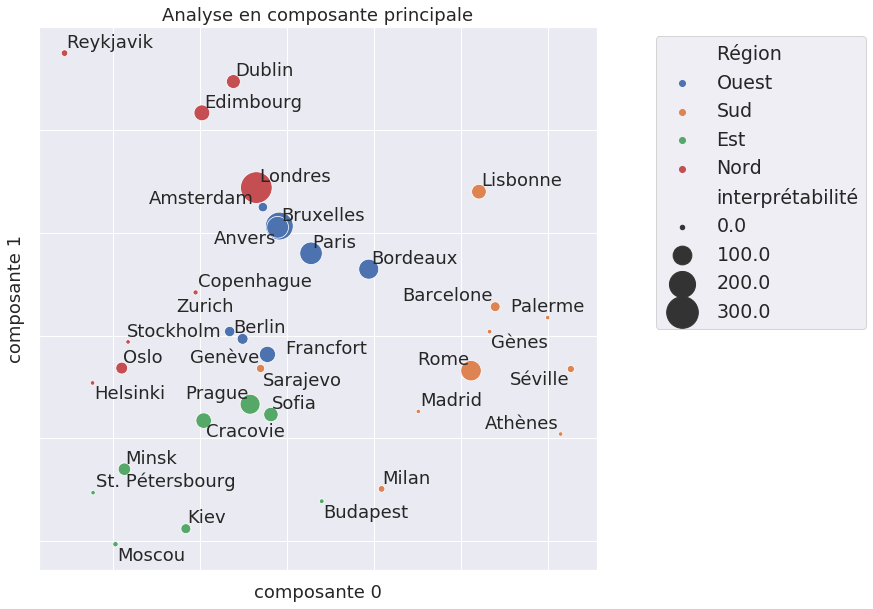

In [0]:
# le code est presque le même, on rajoute juste une information de taille
g = sns.scatterplot(x='composante 0',
                y='composante 1',
                size='interprétabilité',
                sizes=(20,1000),
                data=data_pca,
                hue='Région')

# on agrandit la figure, on annote...
g.figure.set_size_inches(10,10)
ax = plt.gca()
texts = []
for i, (text_x,text_y) in enumerate(data_pca.iloc[:,:2].to_numpy()):
  texts.append(ax.annotate(data_pca.index[i], (text_x,text_y)))
adjust_text(texts)

## on supprime les informations sur les axes, on rajout un titre et une légende
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.title('Analyse en composante principale');
plt.gca().legend(prop={'size': 19}, bbox_to_anchor=(1.5, 1.0));


### Discussion

Maintenant, on voit clairement que certaines villes sont assez mal modélisées par une ACP à seulement 2 composantes, notamment celles du sud. Cela permet de tempérer l'idée qu'elles se comportent de manière similaire. 

Certes, ce groupe se sépare des autres, mais rien ne garantie que le climat à Séville est si proche de celui de Barcelone. En fait, on sait même que ce n'est pas si vrai....

# 6. Une ACP des dimensions au lieu des points

On sait que l'ACP est une opération qui peut être appliquée indiféremment sur les lignes ou bien sur les colonnes d'une matrice. En effet, il suffit au fond de transposer la matrice et on obtient le même problème.

En terme d'analyse de données, une ACP effectuée sur les colonnes va apporter un éclairage différent : elle va nous dire comment se comportent en général les températures mensuelles les unes par rapport aux autres !

In [0]:
# Normalisons les données de chaque mois. L'opérateur T dénote une transposition
x_months = StandardScaler().fit_transform(data[data_columns].T)

# Procédons à l'ACP, avec 2 composantes
n_components = 2
pca_names = ['composante %d' % d for d in range(n_components)]
pca_months = PCA(n_components=n_components).fit(x_months)
data_pca_months = pandas.DataFrame(np.concatenate((pca_months.transform(x_months),
                                                   pca_months.score_samples(x_months)[:,None]), axis=-1), 
                                    index=data_columns,
                                    columns=pca_names+['interprétabilité',])


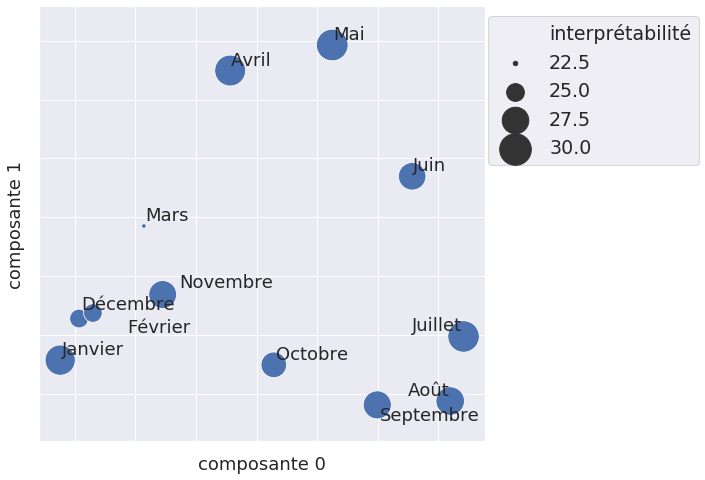

In [0]:
# Réalisons un affichage de nuage de points, où chaque donnée (mois) va apparaître 
g = sns.scatterplot(x='composante 0',
                    y='composante 1',
                    data=data_pca_months,
                    size='interprétabilité',
                    sizes=(20,1000))
plt.gca().legend(prop={'size': 19}, bbox_to_anchor=(1.5, 1.0));  
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.gcf().set_size_inches(8,8)
ax = plt.gca()
texts = []
for i, (text_x,text_y) in enumerate(data_pca_months.iloc[:,:2].to_numpy()):
  texts.append(ax.annotate(data_pca_months.index[i], xy=(text_x,text_y)))
adjust_text(texts);

### Discussion

De cet affichage, on apprend que:
* Novembre-Décembre-Janvier-Février forment un groupe
* Juillet-Août-Septembre forment un groupe
* Avril-Mai-Juin se démarquent des autres  
  $\Rightarrow$ mais ils sont une importante source de variabilité dans l'ensemble !
* Le mois de mars est compliqué !

Tout cela paraît logique, non ?

# 7. Travail à faire

Suivez la procédure indiquée à la fin du premier cours [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/campusplage/dimension-reduction/blob/master/colabs/1_Introduction_pandas.ipynb).

Vous trouverez un squelette de compte-rendu pour le TP associé à chacun de nos 3 cours.

Veuillez noter que la date limite de soumission de l'ensemble est __le 2 décembre à 6h__.